SP02 Project

1. Reading image

In [171]:
import cv2 as cv
import numpy as np

In [172]:
data_pic = cv.imread("./DATA/vp.jpg")
dis_pic(data_pic)

In [173]:
# cv.imshow('image',data_pic)
# cv.waitKey(0)
# cv.destroyAllWindows()

In [174]:
def dis_pic(pic_name):
    cv.imshow('image',pic_name)
    cv.waitKey(0)
    cv.destroyAllWindows()
    

2. Reading dimentions

In [175]:
data_pic_red = data_pic[:,:,1]
# dis_pic(data_pic_red)
filtered_pic = max_rgb_filter(data_pic)
# cv.imshow("Images", np.hstack([data_pic, f]))
# cv.waitKey(0)

In [176]:
def max_rgb_filter(image):
    (B, G, R) = cv.split(image)
    M = np.maximum(np.maximum(R, G), B)
    R[R < M] = 0
    G[G < M] = 0
    B[B < M] = 0

    return cv.merge([B, G, R])

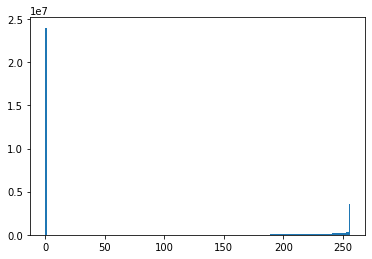

In [177]:
import matplotlib.pyplot as plt
plt.hist(filtered_pic.ravel(),256,[0,256]); plt.show()

In [178]:
bgr_planes = cv.split(data_pic)
print(bgr_planes)

[array([[32, 28, 56, ..., 34, 36, 44],
       [38, 37, 48, ..., 38, 37, 38],
       [43, 55, 59, ..., 36, 29, 28],
       ...,
       [15, 16, 15, ..., 11, 13, 15],
       [10,  9, 12, ...,  9, 12, 16],
       [13,  8, 14, ..., 10, 13, 16]], dtype=uint8), array([[49, 45, 73, ..., 61, 63, 71],
       [55, 54, 65, ..., 65, 64, 65],
       [60, 72, 76, ..., 63, 56, 55],
       ...,
       [21, 22, 22, ..., 16, 18, 20],
       [17, 16, 19, ..., 14, 17, 21],
       [20, 15, 21, ..., 15, 18, 21]], dtype=uint8), array([[246, 242, 255, ..., 255, 255, 255],
       [252, 251, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 250, 249],
       ...,
       [186, 187, 185, ..., 171, 173, 175],
       [180, 179, 182, ..., 169, 172, 176],
       [183, 178, 184, ..., 170, 173, 176]], dtype=uint8)]


In [179]:
def dim(bgr_planes):
    if not type(bgr_planes) == list:
        return []
    return [len(bgr_planes)] + dim(bgr_planes[0])
dim(bgr_planes)

[3]

In [180]:
bgr_planes[0]

array([[32, 28, 56, ..., 34, 36, 44],
       [38, 37, 48, ..., 38, 37, 38],
       [43, 55, 59, ..., 36, 29, 28],
       ...,
       [15, 16, 15, ..., 11, 13, 15],
       [10,  9, 12, ...,  9, 12, 16],
       [13,  8, 14, ..., 10, 13, 16]], dtype=uint8)

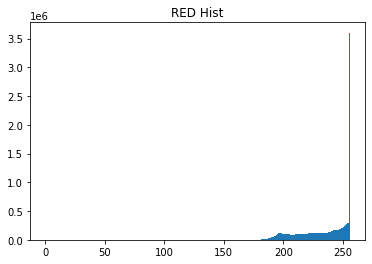

In [181]:
plt.title("RED Hist")
plt.hist(bgr_planes[2].ravel(),256,[0,256]) 
plt.show()


3602173.0

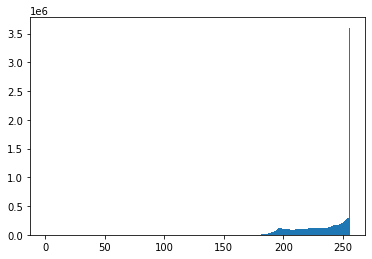

In [182]:
RED = plt.hist(bgr_planes[2].ravel(),256,[0,256]) 
len(RED)
max(RED[0])

In [183]:
# Finding image mean
# image_mean1 = sum(count_R.*binslocation_R)/sum(count_R);

# image_mean = sum(RED[0]*RED[1])/sum(RED[0])

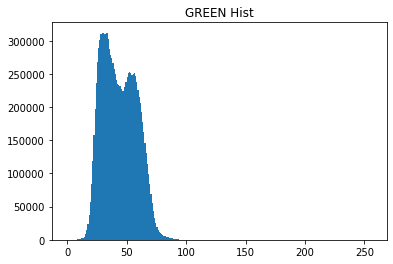

In [184]:
plt.title("GREEN Hist")
plt.hist(bgr_planes[1].ravel(),256,[0,256]) 
plt.show()


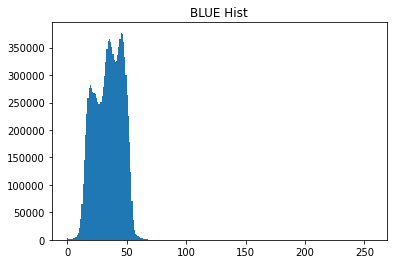

In [185]:
plt.title("BLUE Hist")
plt.hist(bgr_planes[0].ravel(),256,[0,256]) 
plt.show()


Finding MAX vale in R,G,B

In [186]:
bgr_planes[2][0]
print(bgr_planes[2][0].shape)
print(bgr_planes[2].shape)

(3000,)
(4000, 3000)


In [187]:
bgr_planes[2]

array([[246, 242, 255, ..., 255, 255, 255],
       [252, 251, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 250, 249],
       ...,
       [186, 187, 185, ..., 171, 173, 175],
       [180, 179, 182, ..., 169, 172, 176],
       [183, 178, 184, ..., 170, 173, 176]], dtype=uint8)

BLUE index 50 value : 264232.0


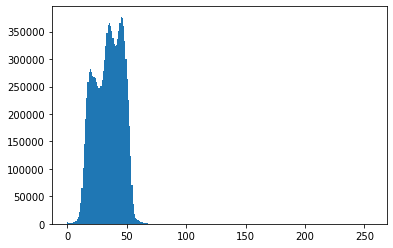

In [188]:
#BLUE BLUE[50] -> y value
BLUE = plt.hist(bgr_planes[0].ravel(),256,[0,256]) 
len(BLUE)
# max(BLUE[0])
print("BLUE index 50 value : {}".format(BLUE[0][50]))

In [189]:




#  RED/RED + BLUE
img_m = max(RED[0])/(max(RED[0])+BLUE[0][50])
print("SPO2 : {}".format(img_m*100))

SPO2 : 93.16595131653305
